### Non-linear Support Vector Machines

You can obtain the dataset used in this lecture here: https://www.kaggle.com/rakeshrau/social-network-ads/data. It is a 'categorical dataset to determine whether a user purchased a particular product'.

In [1]:
#import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import *
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

Here are the functions you used in the previous lectures

In [2]:
def load_data(DATASET_PATH):
    return pd.read_csv(DATASET_PATH)

def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

def one_hot_encode(dataframe, col_name):
    dataframe = pd.get_dummies(dataframe, columns=[col_name], prefix = [col_name])
    return dataframe

Load the dataset, and have a look at its contents

In [3]:
DATASET_PATH = './datasets/Social_Network_Ads.csv'

In [4]:
#create pandas object
ads = load_data(DATASET_PATH)
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


We'll be training our SVM on the Age and Estimated Salary features, to predict whether the user purchased a product based on an ad or not. 

In [5]:
chosen_columns = ['Age','EstimatedSalary','Purchased']
subset = ads.filter(chosen_columns)
subset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Always check whether your subset contains NaN values

In [6]:
check_NaN(subset)

Total NaN: 0
NaN by column:
 Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


Split the dataset into train and test sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(subset.drop(['Purchased'], axis=1),subset['Purchased'],test_size=0.2,random_state=42)                                                                       
print("x train/test ",x_train.shape, x_test.shape)
print("y train/test ",y_train.shape, y_test.shape)

x train/test  (320, 2) (80, 2)
y train/test  (320,) (80,)


In [8]:
x_dev = x_train.values
y_dev = y_train.values
x_t = x_test.values
y_t = y_test.values

Normalisation of data is expected when using SVMs. Learn more here:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

In [9]:
#feature scaling
sc = StandardScaler()

x_dev = sc.fit_transform(x_dev)
x_t = sc.fit_transform(x_t)

C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### SVM Classifier
Create the SVM, and train it on the standardised data

### Parameters for SVC: Gamma and C
A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset resulting in over-fitting.

C parameter used is to maintain regularization. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

In [21]:
svm_classifier = SVC(kernel = 'rbf', random_state=0)#gamma=0.001, C=10
svm_classifier.fit(x_dev, y_dev)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

#### Inference

Pass in the test set, to see how well it performs

In [22]:
predictions = svm_classifier.predict(x_t)

Confusion matrix shows you how many of each class were correctly and incorrectly classified

In [23]:
confusion_matrix(y_t, predictions, labels = [0,1])

array([[47,  5],
       [ 1, 27]], dtype=int64)

#### Evaluation
Evaluation using mean squared error and accuracy, precision and recall

In [24]:
#mean squared error
np.mean((predictions - y_t) ** 2)

0.075

In [25]:
print("Accuracy:",str(metrics.accuracy_score(y_t, predictions)*100)+"%")
print("Precision:",str(round(metrics.precision_score(y_t, predictions)*100))+"%")
print("Recall:",str(round(metrics.recall_score(y_t, predictions)*100))+"%")

Accuracy: 92.5%
Precision: 84.0%
Recall: 96.0%


#### Visualisation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


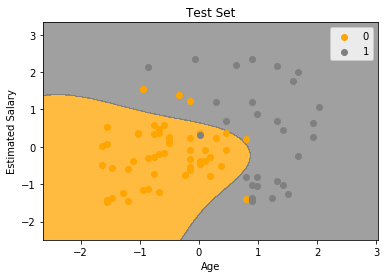

In [26]:
xs, ys = x_t, y_t

X1, X2 = np.meshgrid(np.arange(start = xs[:,0].min() - 1,stop = xs[:,0].max() + 1,step = 0.01),
                     np.arange(start = xs[:,1].min() - 1,stop = xs[:,1].max() + 1,step = 0.01))

plt.contourf(X1,X2, svm_classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('orange','grey')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i, j in enumerate(np.unique(ys)):
    plt.scatter(xs[ys==j,0],xs[ys==j,1],
                c=ListedColormap(('orange','grey'))(i),label = j)

plt.title('Test Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Exercise
Add the feature 'Gender' to the training set, and see if the accuracy improves and the mean squared error drops!